Importuję biblioteki:

In [7]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import statistics
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import math
import pylab

In [8]:
def tablica(ak=list[int]):
    '''Tworzymy listę do metody tablicowej'''
    lista = []
    for i in range(len(ak)):
        lista.extend(i+1 for k in range(ak[i]))
    return lista

In [9]:
print(tablica([4,6,3,1,4,2]))

[1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5, 6, 6]


In [34]:
def Test(n):
    '''Funkcja testująca'''
    tab = tablica([4,6,3,1,4,2])
    d = []
    p = []
    for i in range(len(tab)):
        d.append(1/len(tab))
    distribution = 0.05
    k = 0
#     distribution += d[0]
    for a in range(n):
        x = np.random.randint(1,7)
        for i in range(len(tab)-1):
            if tab[i]==x:
                distribution += d[i]
                k += 1
                print(distribution)
            else:
                plt.hlines(distribution, xmax=tab[i+1], xmin=tab[i])
                p.extend((k+1)*[distribution])
                distribution += d[i]
                k = 0
        distribution = 0.05
    for i in range(tab[-1]):
        p.append(1)
    plt.hlines(1,xmin=tab[-1],xmax=tab[-1]+2)
    plt.hlines(0,xmin=-1,xmax=tab[0])
    plt.show()
    
    x = []
    for i in range(len(tab)):
        for a in range(50):
            x.append(tab[i])
    ecdf = ECDF(x)
    y = ecdf(np.linspace(0, 6, 1000))
    list_1 = [1,2,3,4,5,6]
    y1 = [0, 0.2, 0.5, 0.65, 0.7, 0.9]

    plt.plot(np.linspace(0, 6, 1000), y, label="Dystrybuanta empiryczna")
    plt.step(list_1, y1,label='Dystrybuanta teoretyczna')
    plt.xlim(0.9,6)
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.legend()
    plt.show()
    return d


0.7500000000000001
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003
1.0000000000000002
1.0000000000000002
0.7500000000000001
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003
0.1
0.15000000000000002
0.2
0.25
0.1
0.15000000000000002
0.2
0.25
1.0000000000000002
0.6
0.65
0.7000000000000001
1.0000000000000002
0.8000000000000002
0.8500000000000002
0.9000000000000002
0.9500000000000003
0.1
0.15000000000000002
0.2
0.25
0.1
0.15000000000000002
0.2
0.25
1.0000000000000002
0.1
0.15000000000000002
0.2
0.25
0.6
0.65
0.7000000000000001
0.1
0.15000000000000002
0.2
0.25
0.7500000000000001
1.0000000000000002
1.0000000000000002
0.1
0.15000000000000002
0.2
0.25
1.0000000000000002
1.0000000000000002
0.3
0.35
0.39999999999999997
0.44999999999999996
0.49999999999999994
0.5499999999999999
0.7500000000000001
0.7500000000000001
0.7500000000000001
1.0000000000000002
0.800

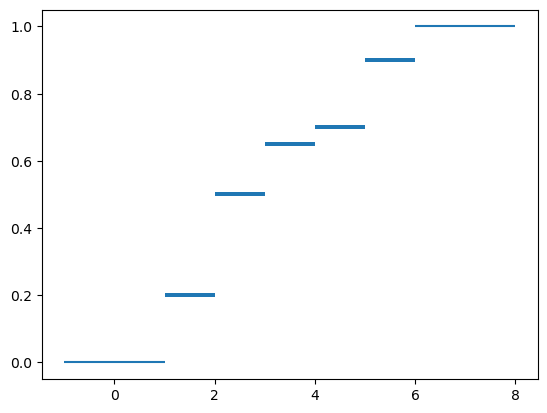

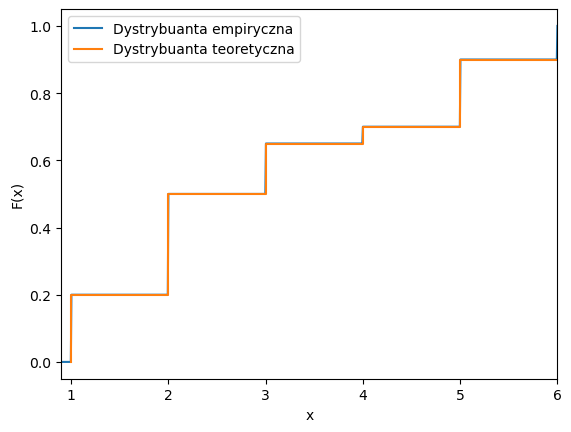

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


In [35]:
print(Test(100))

Rozkład Poissona:

In [6]:
def Poisson(l,n):
    d = [0]
    p = np.e**(-l)
    d.append(p)
    for i in range(1,n):
        p *= l/(i+1)
        #print(p)
        d.append(p+d[-1])
        #print(d[i])
        plt.hlines(d[i],xmin=i-0.5,xmax=i+0.5,colors='r')
    plt.hlines(0, xmin=0, xmax=0.1, colors='r', label='theoretical')
    ecdf = ECDF(d)
    plt.step(n*ecdf.y,ecdf.x,color='b',alpha=0.3,label='empirical')
    plt.title('Poisson distribution')
    plt.xlabel('x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()
    return d

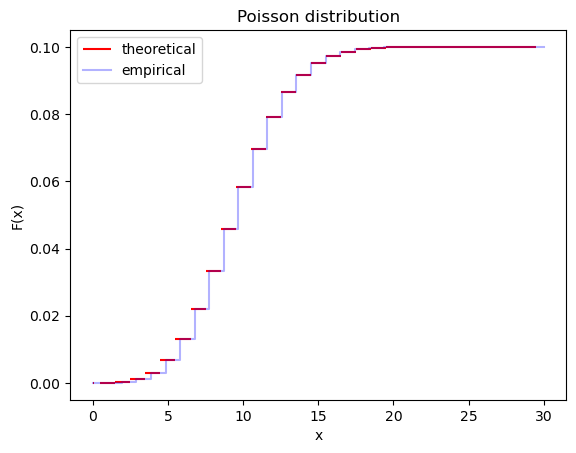

[0, 4.5399929762484875e-05, 0.0002723995785749093, 0.001029065074616324, 0.0029207288147198606, 0.0067040562949269335, 0.013009602095272056, 0.022017524667193658, 0.03327742788209566, 0.045788431454208994, 0.05829943502632233, 0.06967307463733445, 0.07915110764651122, 0.08644190226895489, 0.09164961271355751, 0.09512141967662592, 0.09729129902854368, 0.09856769864731883, 0.09927680954663837, 0.09965002580943812, 0.099836633940838, 0.09992549495579033, 0.0999658863262232, 0.09998344779162881, 0.09999076506888115, 0.09999369197978208, 0.09999481771474399, 0.09999523465361876, 0.09999538356035975, 0.09999543490751182, 0.09999545202322918]


In [7]:
print(Poisson(10,30))

Zadanie 3

In [8]:
def chi_kwadrat(k):
    X = []
    U = []
    df = k
    D = []
    for i in range(1000):
        u = np.random.random()
        U.append(u)
        X.append(st.chi2.ppf(u,df))
        plt.scatter(X[i],u,color='b')
    x = np.linspace(0,25,1000)
    plt.scatter(X[-1],u,color='b',label='empirical dis')
    plt.plot(x,st.chi2.cdf(x,df),color='r',label='theoretical dis')
    plt.legend()
    plt.show()
    
    plt.hist(X,bins=20,density='True',label='histogram')
    plt.plot(x,st.chi2.pdf(x,df),color='r',label='density')
    plt.legend()
    plt.show()
    median = statistics.median(X)
    variance = statistics.variance(X)
    x = st.chi2.rvs(loc=0,scale=1,size=100,df=k)
    st.probplot(x,dist=st.chi2(k),plot=pylab)
    pylab.show()
    
    return median, variance
    

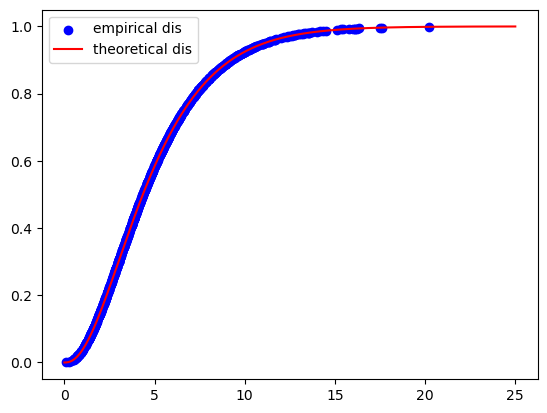

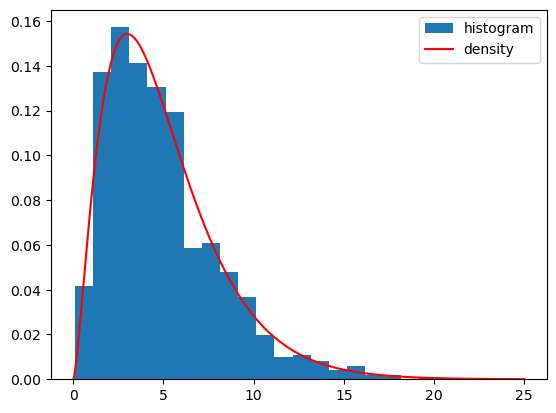

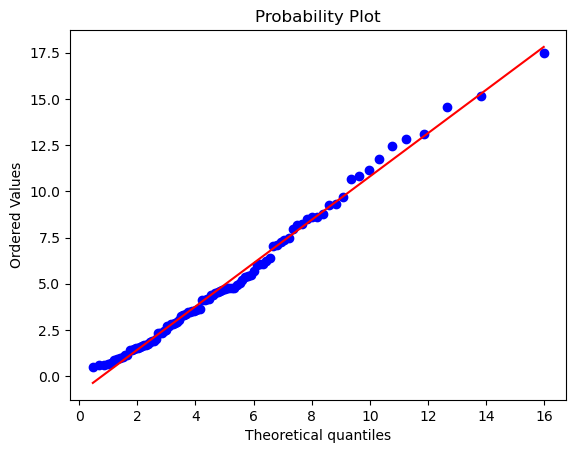

mediana oraz wariancja wynoszą (4.241557261236429, 9.673240341741707)


In [9]:
print('mediana oraz wariancja wynoszą',chi_kwadrat(5))

Zadanie 2

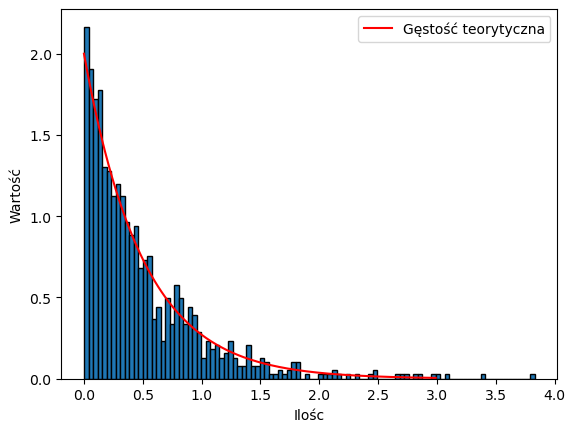

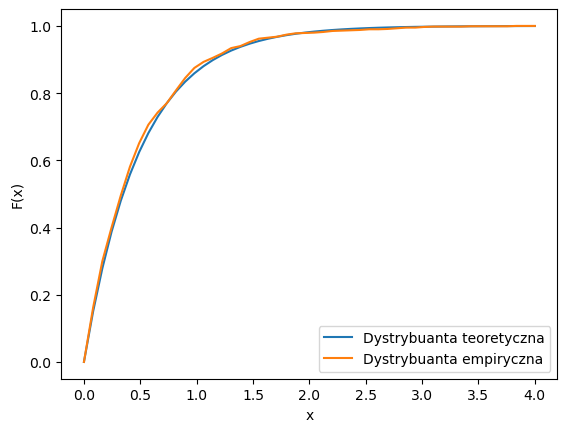

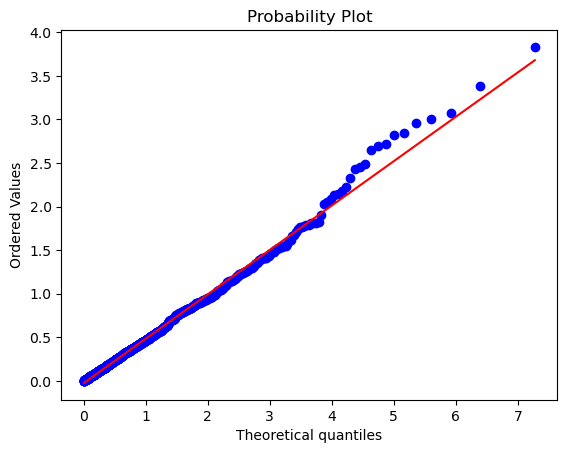

Średnia:  1.495
Wariancja:  0.7499916666666667


In [10]:

def inverse_distribution(lam):
    list_x = []
    for i in range(1000):
        U = np.random.uniform()
        x = np.log(1-U)/-(lam)
        list_x.append(x)
    return list_x

wykładniczy = inverse_distribution(2)
plt.hist(wykładniczy, bins=100, density=True,edgecolor = "black")
x = np.arange(0,3,0.01)
plt.plot(x, st.expon.pdf(x, scale = 1/2), 'r-', label = 'Gęstość teorytyczna') 
plt.xlabel("Ilośc")
plt.ylabel("Wartość")
plt.legend()
plt.show()

xs = np.linspace(0,4)
ecdf = ECDF(wykładniczy)
y = ecdf(xs)
plt.plot(xs,st.expon.cdf(xs, scale = 1/2),label = "Dystrybuanta teoretyczna")
plt.plot(xs, y,label = "Dystrybuanta empiryczna")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()

import scipy.stats as st
st.probplot(wykładniczy, dist="expon", plot=plt)
plt.show()

print("Średnia: ", np.mean(x))
print("Wariancja: ", np.var(x))